In [1]:
%load_ext autoreload
%autoreload 1
import os
from datetime import timedelta

import numpy as np
import obspy
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from obspy import UTCDateTime
from seispy.decon import RFTrace

from insight.util import TraceFile, EventDownloader
from insight.util import trace_slice

In [2]:
DATA_DIR = "../data/"
CAT_FILE = "a_quality.parquet"
EVENT = "S0173a"
network, station, location = "XB", "ELYSE", "02"
before, after = 10, 120

event = pd.read_parquet(os.path.join(DATA_DIR, CAT_FILE)).loc[EVENT]
trace_file = TraceFile(network, station, location, event.id)
st = obspy.read(os.path.join(DATA_DIR, "zne", str(trace_file)))
events_dl = EventDownloader(DATA_DIR, before=before, after=after)
event

id                                   mqs2019jzqa
region name                    Elysium Southeast
time                 2019-05-23T02:19:09.852879Z
quality                                        A
mqs_azimuth                                 91.0
mqs_distance                           30.006507
p_arrival       2019-05-23 02:22:42.300000+00:00
M_w                                          3.7
pp_arrival                                   NaT
Name: S0173a, dtype: object

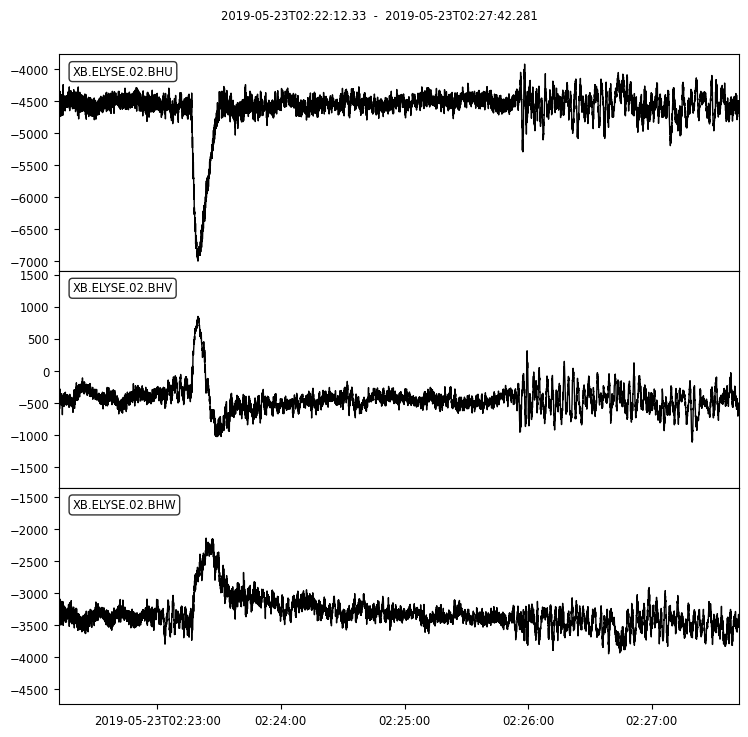

In [3]:
st = events_dl.get_stream(
    network=network,
    station=station,
    location=location,
    channel="BH?",
    est_p_arrival=event.p_arrival,
    evt_id=event.id
)
st.plot(show=False)

In [4]:
from seisglitch import detect
from yaml import safe_load
with open("../seisglitch-config.yaml") as cfg:
    config = safe_load(cfg)
config["detect"]

{'detector': {'taper_length_per_side': 0.0,
  'pre_filt': False,
  'water_level': 60,
  'ACCfilter': {'type': 'bandpass',
   'options': {'freqmin': 0.001,
    'freqmax': 0.1,
    'corners': 3,
    'zerophase': True},
   'string': '0.001 < f < 0.1'},
  'threshold': 5e-10,
  'plot_triggering': False,
  'glitch_min_length': 5,
  'glitch_length': 25,
  'glitch_min_polarization': 0.91}}

In [6]:
trace_file = "../data/traces/XB.ELYSE.02.MQS2019JZQA.mseed"
detect.detect(trace_file, "../inventory_VBB.xml", **config["detect"])


  -----------------------
  RUNNING GLITCH DETECTOR
  -----------------------


INFO: Analysing seismic traces of file: 1/2
../data/traces/XB.ELYSE.02.MQS2019JZQA.mseed
  XB.ELYSE.02.BHU | 2019-05-23T02:22:12.330000Z - 2019-05-23T02:27:42.280000Z | 20.0 Hz, 6600 samples
  XB.ELYSE.02.BHV | 2019-05-23T02:22:12.331000Z - 2019-05-23T02:27:42.281000Z | 20.0 Hz, 6600 samples
  XB.ELYSE.02.BHW | 2019-05-23T02:22:12.330000Z - 2019-05-23T02:27:42.280000Z | 20.0 Hz, 6600 samples

INFO: Preparing data.
  XB.ELYSE.02.BHU | 2019-05-23T02:22:12.330000Z - 2019-05-23T02:27:42.280000Z | 20.0 Hz, 6600 samples
  XB.ELYSE.02.BHV | 2019-05-23T02:22:12.331000Z - 2019-05-23T02:27:42.281000Z | 20.0 Hz, 6600 samples
  XB.ELYSE.02.BHW | 2019-05-23T02:22:12.330000Z - 2019-05-23T02:27:42.280000Z | 20.0 Hz, 6600 samples
INFO: Inventory retrieved online from 'IPGP'
INFO: Inventory used that was passed
INFO: Removing instrument response, using `pre_filt` and/or `water_level`.
INFO: Finding peaks in time derivative

 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
 WARNING (norm_resp): computed and reported sensitivities differ by more than 5 percent. 
	 Execution continuing.
